# Predicting prices of Dubai Properties 

# Using Different Regression Models

Here we are using,
  1. Multiple Linear Regression
  2. Decision Tree Regression
  3. SV Regression
  4. Random Forest Regression

Then we are going to compare each of the model and use the most accurate model.

Step1 : Data Preprocessing 

Processing the dataset in order to ensure performance of the model.

Step 1.1 -  Installing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 1.2 - Reading the dataset into the environment

In [2]:
dataset = pd.read_csv('properties_data.csv')
dataset.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


Step 1.3 - Checking Null Values

Here what we do is we check whether if any of the data columns have considerable amount of null values, in order to get the next necessary action (
    like filling the null values or dropping out that entire column.
)

In [3]:
dataset.isna().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

Since our dataset's any of the columns don't contain any null value, we proceeded with the next step.

Here what we displayed the data type of the each data column.

In [4]:
result = dataset.dtypes
print(result)

id                       int64
neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
price_per_sqft         float64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_s

Step 1.4 - Converting data types

Since neighborhood and quality columns in the object data type, we are converting them to categorical values, in order to make it easy for us to use that in our model without any difficulties.

In [5]:
dataset = dataset.astype({'neighborhood': 'category', 'quality': 'category'})
dataset.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


After converting the data types, we can see that the data types of neighborhood and quality are changed to category.

In [6]:
result = dataset.dtypes
print(result)

id                        int64
neighborhood           category
latitude                float64
longitude               float64
price                     int64
size_in_sqft              int64
price_per_sqft          float64
no_of_bedrooms            int64
no_of_bathrooms           int64
quality                category
maid_room                  bool
unfurnished                bool
balcony                    bool
barbecue_area              bool
built_in_wardrobes         bool
central_ac                 bool
childrens_play_area        bool
childrens_pool             bool
concierge                  bool
covered_parking            bool
kitchen_appliances         bool
lobby_in_building          bool
maid_service               bool
networked                  bool
pets_allowed               bool
private_garden             bool
private_gym                bool
private_jacuzzi            bool
private_pool               bool
security                   bool
shared_gym                 bool
shared_p

checking what are the categories we have inside the "neighborhood" and "quality" data columns

In [7]:
categories = dataset['neighborhood'].cat.categories
print(categories)

Index(['Al Barari', 'Al Barsha', 'Al Furjan', 'Al Kifaf', 'Al Quoz',
       'Al Sufouh', 'Arjan', 'Barsha Heights (Tecom)', 'Bluewaters',
       'Business Bay', 'City Walk', 'Culture Village', 'DAMAC Hills', 'DIFC',
       'Discovery Gardens', 'Downtown Dubai',
       'Dubai Creek Harbour (The Lagoons)', 'Dubai Festival City',
       'Dubai Harbour', 'Dubai Healthcare City', 'Dubai Hills Estate',
       'Dubai Land', 'Dubai Marina', 'Dubai Production City (IMPZ)',
       'Dubai Residence Complex', 'Dubai Silicon Oasis',
       'Dubai South (Dubai World Central)', 'Dubai Sports City',
       'Falcon City of Wonders', 'Green Community', 'Greens',
       'International City', 'Jebel Ali', 'Jumeirah',
       'Jumeirah Beach Residence', 'Jumeirah Golf Estates',
       'Jumeirah Lake Towers', 'Jumeirah Village Circle',
       'Jumeirah Village Triangle', 'Meydan', 'Mina Rashid', 'Mirdif',
       'Mohammed Bin Rashid City', 'Motor City', 'Mudon', 'Old Town',
       'Palm Jumeirah', 'Remraam',

In [8]:
categories = dataset['quality'].cat.categories
print(categories)

Index(['High', 'Low', 'Medium', 'Ultra'], dtype='object')


It is visible that "neighborhood" column has more than 10 different catogories and some of them does not contain data records more than 20.

In [9]:
dataset['neighborhood'].value_counts()

neighborhood
Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Dubai Harbour                         30
Greens                                30
Motor City                            27
Town Square                           27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Meydan                                17
Old Town                              17
City Walk                             14
Umm Suqeim                            13
Dub

Step 1.5 - Dropping unncecessary columns

Since the column neigborhood has more than ten categories and some of them contains less records, so we gonna drop that column,
and the latitude and longitude related with the location and since we are dropping the neighbourhood we gonna drop those columns too,
to avoid the model complexity.

and the ID of the record does not contain any predictive power, we can drop that column too.

In this data mining project as as sub part we are trying to predict the quality of the property as well, so first using regression model we are going predict the price of the model, and then using that price we are going to predict its quality, so we will be deleting that "quality" column also from here.

“Price” is the response variable and therefore “price per square feet” cannot be considered as a predictor variable, so here we dropping that column too.

In [10]:
dataset2 = dataset.drop(['neighborhood', 'longitude', 'latitude','price_per_sqft','id','quality'], axis=1)
dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,2,2,False,False,True,False,True,True,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,3,5,True,True,True,False,True,False,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,2,3,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,0,1,False,False,False,False,True,True,...,False,True,True,True,True,False,False,True,True,False


Step 1.6 - Encoding category labels to numerical values

Encoding data columns which have labels ( True and False).

True - 1, False - 0

In [11]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset_encoded = dataset2.iloc[:,4:33]

for i in dataset_encoded:
    dataset2[i] = le.fit_transform(dataset_encoded[i])

dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,2850000,1582,2,2,0,0,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
2,1150000,1951,3,5,1,1,1,0,1,0,...,0,1,1,1,0,0,0,1,1,1
3,2850000,2020,2,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1729200,507,0,1,0,0,0,0,1,1,...,0,1,1,1,1,0,0,1,1,0


Step 1.7 - Rearraging columns

Since in this Regression Models, our response varibale is 'Price' we put it as the last column, so that is why we rearrange the dataset

In [12]:
columns = [ 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms' ,'maid_room' ,'unfurnished' ,            
               'balcony' , 'barbecue_area' , 'built_in_wardrobes', 'central_ac' ,'childrens_play_area' ,'childrens_pool' ,         
                'concierge' , 'covered_parking','kitchen_appliances' ,'lobby_in_building','maid_service' ,'networked',
                'pets_allowed' ,'private_garden' ,'private_gym' ,'private_jacuzzi' ,'private_pool' ,'security' ,'shared_gym' ,  
                'shared_pool' ,'shared_spa' ,'study' ,'vastu_compliant' ,'view_of_landmark' ,'view_of_water' ,'walk_in_closet' ,
                'price'] 
dataset2 = dataset2[columns]

In [13]:
dataset2.head()

,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,price
0,1079,1,2,0,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,2700000
1,1582,2,2,0,0,1,0,1,1,1,...,0,1,1,0,0,0,0,1,0,2850000
2,1951,3,5,1,1,1,0,1,0,0,...,1,1,1,0,0,0,1,1,1,1150000
3,2020,2,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2850000
4,507,0,1,0,0,0,0,1,1,0,...,1,1,1,1,0,0,1,1,0,1729200


Now the data processing part is completed. We have remove unncessary data columns that can add a complexity to our model, then we convert data types and encodes label values to numerical values.

Our dataset is now ready to use in our model.

Step 2 - Defining the dependent and independent variables

In our dataset there are 32 variables.

In this regression models, our dependent variable is 'Price', while other 31 columns are independent variable

In [14]:
X = dataset2.iloc[:,0:31].values
Y = dataset2.iloc[:,-1].values

In [15]:
import pandas as pd

# Create a DataFrame from the X variable
X_df = pd.DataFrame(X)


In [16]:
# Print the DataFrame
X_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1079,1,2,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,1582,2,2,0,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
2,1951,3,5,1,1,1,0,1,0,0,...,0,1,1,1,0,0,0,1,1,1
3,2020,2,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,507,0,1,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1087,2,2,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1901,760,1,2,0,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,1
1902,1930,3,5,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1903,740,1,2,0,1,1,0,1,1,1,...,0,1,1,1,0,0,0,0,1,1


In [17]:
import pandas as pd

# Create a DataFrame from the X variable
Y_df = pd.DataFrame(Y)

In [18]:
Y_df

,0
0,2700000
1,2850000
2,1150000
3,2850000
4,1729200
...,...
1900,1500000
1901,1230000
1902,2900000
1903,675000


Step 3 - Splitting the dataset into test and training dataset

80% of the records will be use for training while 20% of records use to test the model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 4 - Building Regression Models

# 1.Multiple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_pred = lin_regressor.predict(X_test)

In [23]:
print(X_test[0])
print(Y_test[0])

[1186    1    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
1750000


In [24]:
lin_regressor.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1718714.28720977])

# 2. Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor(max_depth = 5)
tree_regression.fit(X_test, Y_test)

DecisionTreeRegressor(max_depth=5)

In [26]:
y_pred_1 = tree_regression.predict(X_test)

In [27]:
print(X_test[0])
print(Y_test[0])

[1186    1    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
1750000


In [28]:
tree_regression.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1392497.46376812])

# 3.SV Regression

In [29]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(X_test, Y_test)

SVR()

In [30]:
y_pred_2 = regressor_SVR.predict(X_test)

In [31]:
regressor_SVR.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1390001.40625886])

# 4.Random Forest Regressor 

In [32]:
from sklearn.ensemble import RandomForestRegressor
rand_regression = RandomForestRegressor(n_estimators = 10, random_state = 0)
rand_regression.fit(X_test, Y_test)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
y_pred_3 = rand_regression.predict(X_test)

In [34]:
Y_test[0]

array([1560499.9])

In [ ]:
rand_regression.predict(sc.transform([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]]))

Step 5 - Comparing built regression models

In [35]:
from sklearn.metrics import r2_score
print("Multiple Linear Regression R2 Score",r2_score(Y_test, y_pred))
print("Decision Tree Regression R2 Score", r2_score(Y_test, y_pred_1))
print("Support Vector Regression R2 Score", r2_score(Y_test, y_pred_2))
print("Random Forest Regression R2 Score", r2_score(Y_test, y_pred_3))

Multiple Linear Regression R2 Score 0.7497157467812359
Decision Tree Regression R2 Score 0.9658626000401075
Support Vector Regression R2 Score -0.04884327763733376
Random Forest Regression R2 Score 0.970507141272015


In [36]:
models = ["Multiple","Decision Tree","Support Vector","Random Forest"]
n = [r2_score(Y_test, y_pred),r2_score(Y_test, y_pred_1),r2_score(Y_test, y_pred_2),r2_score(Y_test, y_pred_3)]
y_pos = np.arange(len(models))
highlights = ['grey'if (x<max(n)) else 'red' for x in n]

<BarContainer object of 4 artists>

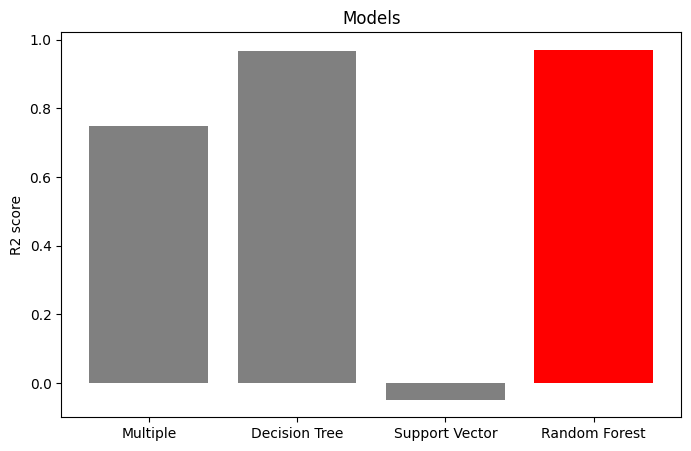

In [37]:
plt.figure(figsize=(8,5))
plt.xticks(y_pos,models)
plt.ylabel('R2 score')
plt.title('Models')
plt.bar(y_pos,n,color=highlights)

In [38]:
import pickle
pickle.dump(rand_regression,open('Frontend/Model/rfmodel.pkl','wb'))

According the bar graph, it shows that most accurate model is 'Random Forest' one, so we will be using that model for our software solution.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred_3)

print(mse)